# Color Threshold, Green Screen

### Import resources

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib inline

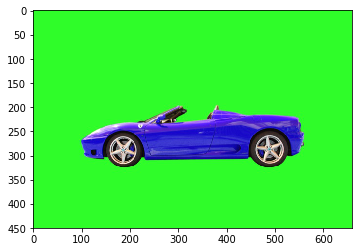

In [3]:
image = cv2.imread('images/car_green_screen.jpg')
plt.imshow(image)

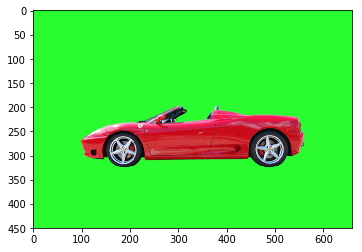

In [29]:
image_copy = np.copy(image)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)
plt.imshow(image_copy)

In [30]:
print('Shape :',image_copy.shape)
lower_green = np.array([0, 230, 0])
upper_green = np.array([120, 255, 120])

Shape : (450, 660, 3)


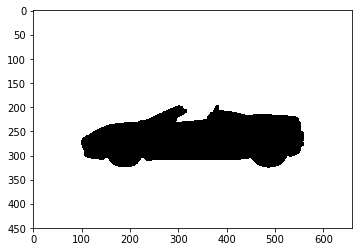

In [31]:
mask = cv2.inRange(image_copy, lower_green, upper_green)
plt.imshow(mask, cmap='gray')

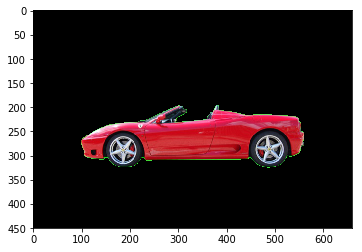

In [32]:
image_copy[mask != 0] = [0, 0, 0]
plt.imshow(image_copy)

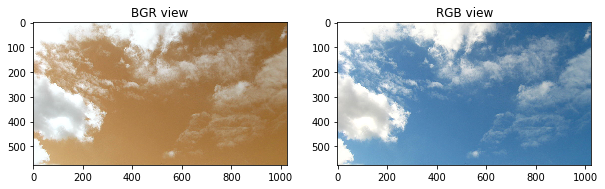

In [33]:
background_image = cv2.imread('images/sky.jpg')
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))
ax1.set_title('BGR view')
ax1.imshow(background_image)
ax2.set_title('RGB view')
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)
ax2.imshow(background_image)

In [34]:
background_image = background_image[0:450, 0:660]

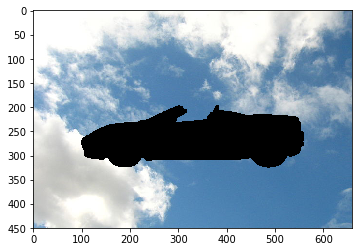

In [35]:
background_image[mask == 0] = [0, 0 , 0]
plt.imshow(background_image, cmap = 'gray')

Final image


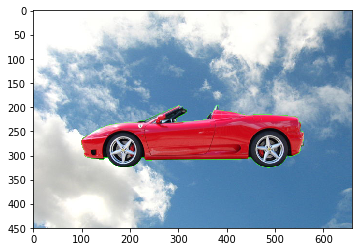

In [36]:
final_image = background_image + image_copy
print('Final image')
plt.imshow(final_image)